<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch5_SVMRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 1. Linear SVM Regression (LinearSVR)

In [0]:
np.random.seed(42)

m = 100
X = 2 * np.random.randn(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [0]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [0]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg, X, y)

eps_x1 = 1
eps_y_pred = svm_reg.predict([[eps_x1]])

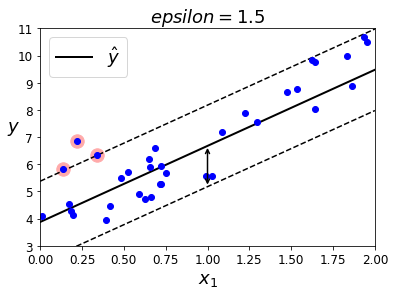

In [0]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)    

plt.figure(figsize=(6, 4))
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(r"$epsilon = {}$".format(svm_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg.epsilon),
             textcoords='data', 
             arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})

plt.show()

# 2. Non-linear SVM Regression (SVR(kernel="poly"))

In [0]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [0]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')

svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

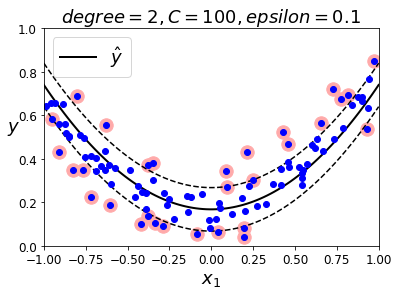

In [0]:
plt.figure(figsize=(6, 4))
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, epsilon = {}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()